In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.io
import h5py
%matplotlib inline
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, Conv1D,MaxPooling1D, Flatten,TimeDistributed
import os
import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [2]:
Eigen_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/EigenWorms.mat'
Footage_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/20150814-All-PNAS2011-DataStitched .mat'

In [3]:
class EigenData(object):
    '''Represents the original experiment data.'''

    def __init__(self):
        self._eigenworms = None

    def get_eigenworms(self, eigen_path):
        '''
        Loads the matlab files from the original experiment and parses them
        into expected numpy formats.

        Eigenworms are stored as 100 'angles' at equidistributed coordinates
        down the body.
        '''
        # Load the matlab files into numpy arrays
        eigenworms = scipy.io.loadmat(eigen_path)
        self._eigenworms = eigenworms["EigenWorms"].transpose()
        return self._eigenworms

    def get_footage(self, footage_path):
        '''
        Loads the matlab files from the original experiment and parses them
        into expected numpy formats.

        Footage is stored as coefficients with respect to the eigenworm basis.
        '''
        f = h5py.File(footage_path, 'r')
        footage = {}
        for k, v in f.items():
            if k != 'tr':
                for k2, v2 in v.items():
                    if v2.shape == (5, 33600) or v2.shape == (6, 33600):
                        footage[k2] = np.array(v2)
        return footage

    def reconstruct(self, coefficients):
        '''
        Reconstruct multiple postures from basis coefficients to angles.
        '''
        n_basis_required = coefficients.shape[0]
        print(self._eigenworms[0:n_basis_required, :].transpose().shape,
              coefficients.shape)
        return self._eigenworms[0:n_basis_required, :].transpose() @ \
            coefficients

In [4]:
# if __name__ == "__main__":
data = EigenData()
Eigen_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/EigenWorms.mat'
Footage_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/20150814-All-PNAS2011-DataStitched .mat'
worm_data = data.get_eigenworms(Eigen_path)

footage = data.get_footage(Footage_path)
for k in footage.keys():
    print(k, footage[k].shape)
    r = data.reconstruct(footage[k])
    print('-->', r.shape)

b (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
c (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
d (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
e (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
f (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
g (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
h (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
i (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
j (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
k (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
l (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)


In [5]:
letter = 'm'
print(letter, footage[letter].shape)
rb = data.reconstruct(footage[letter])
print('-->', rb.shape)

m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)


In [6]:
### All the data
raw_data = pd.DataFrame(rb)
raw_data = raw_data.dropna(axis=1)

### Normalise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
all_shape = pd.DataFrame(scaler.fit_transform(raw_data))
raw_data = all_shape.T

raw_data.shape

(28494, 100)

### PCA for dimension reduction

In [7]:
pca = PCA(n_components=0.95)
pca.fit(raw_data.T)
reduced = pca.transform(raw_data.T)
# reduced_shapes_for_testing = scaler.fit_transform(reduced)
pca.explained_variance_ratio_, reduced.shape

(array([0.37609224, 0.33640922, 0.19814479, 0.07599901]), (100, 4))

In [8]:
reduced = scaler.fit_transform(reduced)

In [9]:
rr = np.dot(raw_data, reduced)
basis = scaler.fit_transform(rr)


### ploting 4 basic shapes with variance explained graph

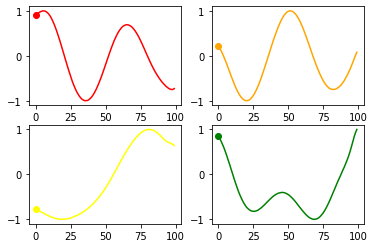

In [10]:
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=False))
axs[0, 0].plot(reduced.T[0],'-o',c='red',markevery=[0])
axs[0, 1].plot(reduced.T[1],'-o',c='orange',markevery=[0])
axs[1, 0].plot(reduced.T[2],'-o',c='yellow',markevery=[0])
axs[1, 1].plot(reduced.T[3],'-o',c='green',markevery=[0])
plt.show()

In [11]:
# plt.scatter(np.arange(1,7),np.cumsum(pca.explained_variance_ratio_), c='red' )
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

### Data after dimension reduction

In [43]:
a = np.array([0.000559163118727884,0.00040429634728131005,0.0004940963993315135,0.0006652461854368545, 0.0007776287080668982,0.0004395043646480211, 0.0003493819446557072,0.000421710589130193, 0.0013341724070656763,0.0004968524795441078 ])
print(len(a))

10


In [45]:
np.mean(a), np.average(a)

(0.0005942052543888165, 0.0005942052543888165)

In [12]:
data = pd.DataFrame(basis)
data.head()

0         1         2         3
0 -0.395128 -0.049248  0.590389  0.505762
1 -0.350766 -0.016766  0.592195  0.542087
2 -0.293203  0.027500  0.588233  0.581448
3 -0.217026  0.092231  0.557880  0.628945
4 -0.139722  0.147796  0.511146  0.672521

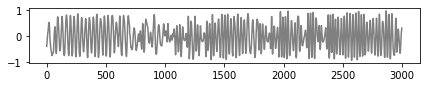

In [16]:
plt.figure(figsize=(7,1))
plt.plot(data[0][:3000], c='grey')

### Training testing split

In [ ]:
### using 70% data as training set, 30% as test set
training = data[:int(len(data)*0.7)]
testing = data[len(training):]

### Split sequences

In [ ]:
from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
training_data = np.array(training.values)
testing_data = np.array(testing.values)



In [ ]:
n_steps = 50
X_train, y_train = split_sequences(training_data,50)
X_test, y_test = split_sequences(testing_data,50)
n_features = X_train.shape[2]

In [ ]:
X_train = X_train.reshape((X_train.shape[0],n_steps, n_features))
# y_train = y_train.reshape(y_train.shape[0],y_train.shape[1])

X_test = X_test.reshape((X_test.shape[0],n_steps, n_features))

In [ ]:
from keras.layers import Bidirectional


In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps,n_features)))
model1.add(Dropout(0.2))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Dropout(0.2))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(n_features, activation='linear'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
import time
start = time.time()
model1.fit(X_train, y_train, epochs=100, verbose=1)
end = time.time()
print(end - start)

Epoch 1/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0277 - accuracy: 0.8154
Epoch 2/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0080 - accuracy: 0.9037
Epoch 3/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0055 - accuracy: 0.9221
Epoch 4/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9275
Epoch 5/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9342
Epoch 6/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9341
Epoch 7/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.9380
Epoch 8/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0035 - accuracy: 0.9377
Epoch 9/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0033 - accuracy: 0.9399
Epoch 10/100
622/622 [==============================] - 2s 3ms/step - loss: 0.0032 - accura

In [ ]:
model1.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 48, 64)            832       
_________________________________________________________________
dropout_120 (Dropout)        (None, 48, 64)            0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 46, 64)            12352     
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 44, 64)            12352     
_________________________________________________________________
dropout_121 (Dropout)        (None, 44, 64)            0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 42, 64)            12352     
_________________________________________________________________
dropout_122 (Dropout)        (None, 42, 64)          

In [ ]:
lstm = model1.predict(X_test)
lstm.shape

(8499, 4)

In [ ]:
y_test.shape

(8499, 4)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

all_euc_lstm = []
all_mse_lstm = []
mae = []
for i in range(y_test.shape[0]):
  dist = np.linalg.norm(y_test[i]- lstm[i])
  all_euc_lstm.append(dist)
  all_mse_lstm.append(mean_squared_error(y_test[i], lstm[i]))
  mae.append(mean_absolute_error(y_test[i], lstm[i]))

average_eul_lstm = np.mean(all_euc_lstm)
average_mse_lstm = np.mean(all_mse_lstm)
av = np.mean(mae)
print(average_eul_lstm)
print(average_mse_lstm)
print(av)

0.12018073473340586
0.0043371684487487645
0.0503363738046751


In [ ]:
a = np.linalg.norm(y_test[0]- lstm[0])
b = mean_absolute_error(y_test[0], lstm[0])

0.07323114494817343

In [ ]:
Channel_1_eul = np.linalg.norm(y_test.T[0] - lstm.T[0])
Channel_1_mse = mean_squared_error(y_test.T[0], lstm.T[0])

Channel_2_eul = np.linalg.norm(y_test.T[1] - lstm.T[1])
Channel_2_mse = mean_squared_error(y_test.T[1], lstm.T[1])

Channel_3_eul = np.linalg.norm(y_test.T[2] - lstm.T[2])
Channel_3_mse = mean_squared_error(y_test.T[2], lstm.T[2])

Channel_4_eul = np.linalg.norm(y_test.T[3] - lstm.T[3])
Channel_4_mse = mean_squared_error(y_test.T[3], lstm.T[3])

In [ ]:
print('Channel 1 eul = {}, Channel 1 MSE = {}'.format(Channel_1_eul,Channel_1_mse))

print('Channel 2 eul = {}, Channel 2 MSE = {}'.format(Channel_2_eul,Channel_2_mse))

print('Channel 3 eul = {}, Channel 3 MSE = {}'.format(Channel_3_eul,Channel_3_mse))

print('Channel 4 eul = {}, Channel 4 MSE = {}'.format(Channel_4_eul,Channel_4_mse))

Channel 1 eul = 6.692950009714813, Channel 1 MSE = 0.005270688296569187
Channel 2 eul = 6.831122684805345, Channel 2 MSE = 0.005490556198948368
Channel 3 eul = 6.031490549655013, Channel 3 MSE = 0.004280371602609452
Channel 4 eul = 4.428056386913064, Channel 4 MSE = 0.0023070576968680524
